C:\Users\Admin\AppData\Local\Temp\ipykernel_64812\3216381305.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage_difference'] = (df_merged['count_mostliked'] - df_merged['count_random']) / df_merged['count_random'] * 100


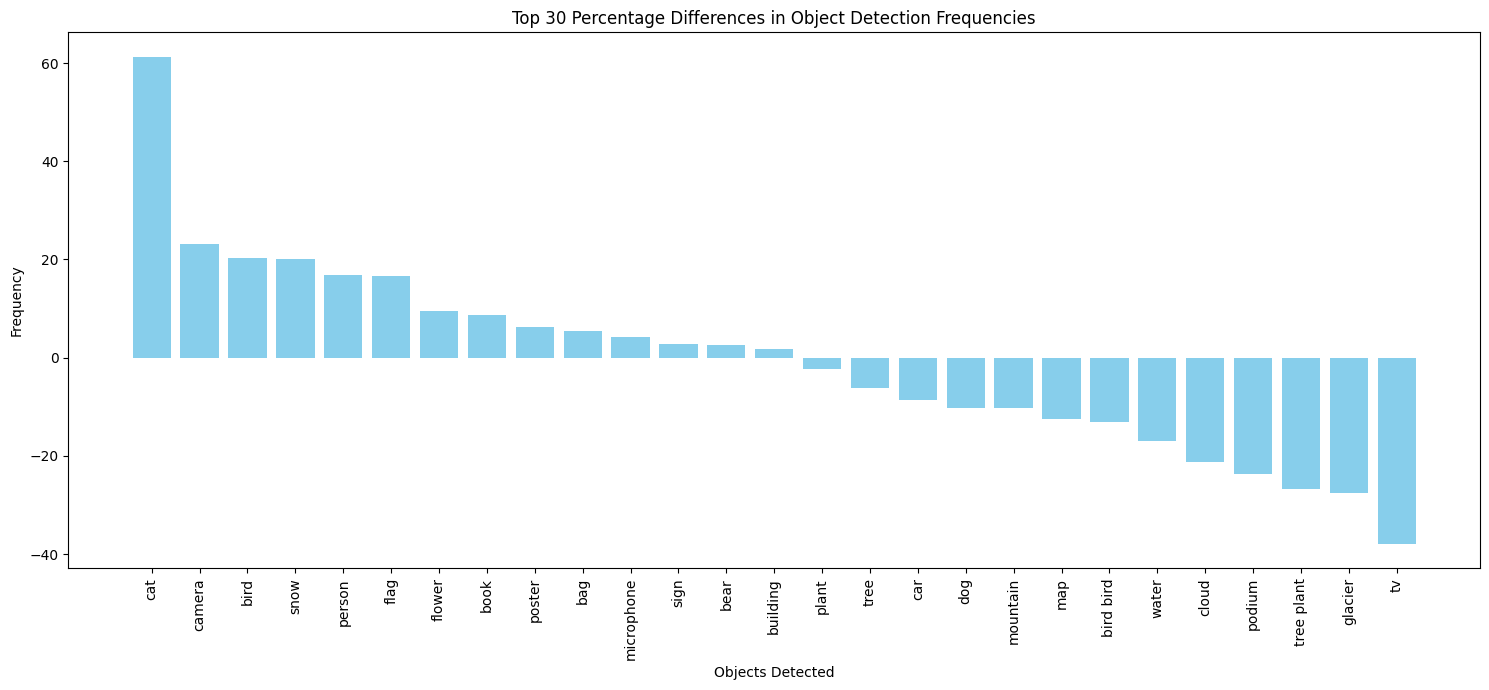

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

file_path_random = 'C:\\Users\\Admin\\Documents\\GitHub\\Team_Project_ComputerVision\\dataset_results\\current\\result_dino_randomsubset1.xlsx'
file_path_mostliked = 'C:\\Users\\Admin\\Documents\\GitHub\\Team_Project_ComputerVision\\dataset_results\\current\\result_dino_mostlikeddataset.xlsx'

df_random = pd.read_excel(file_path_random, engine='openpyxl')
df_mostliked = pd.read_excel(file_path_mostliked, engine='openpyxl')

all_results_random = df_random['object_detection_results'].dropna().str.split(',').sum() # split the object string
flat_results_random = [item.strip() for item in all_results_random if item.strip()]
value_counts_random = Counter(flat_results_random)

all_results_mostliked = df_mostliked['object_detection_results'].dropna().str.split(',').sum()
flat_results_mostliked = [item.strip() for item in all_results_mostliked if item.strip()]
value_counts_mostliked = Counter(flat_results_mostliked)

# because dataset 5.000 instead of 10.000
for key in value_counts_mostliked:
    value_counts_mostliked[key] *= 2


df_random_counts = pd.DataFrame.from_dict(value_counts_random, orient='index', columns=['count_random'])
df_mostliked_counts = pd.DataFrame.from_dict(value_counts_mostliked, orient='index', columns=['count_mostliked'])

df_merged = pd.merge(df_random_counts, df_mostliked_counts, left_index=True, right_index=True, how='outer').fillna(0)
df_filtered = df_merged[(df_merged['count_random'] > 25) & (df_merged['count_mostliked'] > 25)]


df_filtered['percentage_difference'] = (df_merged['count_mostliked'] - df_merged['count_random']) / df_merged['count_random'] * 100
df_top_diff = df_filtered.nlargest(30, 'percentage_difference')
 

labels = []
counts = []

#for key, count in df_top_diff.items():
#    labels.append(key)
#   counts.append(count)
    

# Plot the data
plt.figure(figsize=(15, 7))
plt.bar(df_top_diff.index, df_top_diff['percentage_difference'], color='skyblue')
plt.xlabel('Objects Detected')
plt.ylabel('Frequency')
plt.title('Top 30 Percentage Differences in Object Detection Frequencies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
